In [42]:
import numpy as np
import pandas as pd
import lab3
import matplotlib.pyplot as plt
import main

In [51]:
lam = 1

N = np.array([100, 150, 50, 150, 80, 40, 250])
U = np.array([60, 36, 42, 42, 30, 60, 90])
stations = 7
max_employees = 15
MOS_table = np.zeros((stations, max_employees))

for employees in range(1, max_employees+1):
    p_i = 0.05*employees


    a = [lam/(p_i*n-2) for n in N]
    b = [lam/(n-p_i*n) for n in N]
    c = [1/u*employees for u in U]



    special_case = np.zeros(stations)

    for i in range(stations):
        if p_i*N[i]<3:
            special_case[i] = 1

    df, MOS_scores = lab3.calculate_results(a, b, c, stations, employees, special_case)
    MOS_table[:,employees-1] = MOS_scores
    print(df["v"].iloc[3])
    df1 = pd.DataFrame(MOS_table, columns=range(1, 16))

0.7987163029525033
0.9168552036199095
0.9598504634608491
0.9780564263322884
0.9867056303238242
0.99125
0.993843786071566
0.9954249789922505
0.9964393254701771
0.997114931700424
0.9975756701179697
0.9978916569854998
0.9981030131603462
0.9982311320754716
0.9982829572557101


<ipython-input-51-e0d45626cb08>:13: RuntimeWarning: divide by zero encountered in double_scalars
  a = [lam/(p_i*n-2) for n in N]


In [52]:
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,1.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [45]:
def run_lab2():
    customer_interval_lambda = 1/3
    moving_time_lambda = 2
    scanning_time = 0.1
    paying_time = 0.2
    time_to_pick_item = np.array([0.1, 0.15, 0.1, 0.1, 0.15, 0.1, 0.2])
    N = np.array([100, 150, 50, 150, 80, 40, 250])
    refilling_time = np.array([60, 36, 42, 42, 30, 60, 90])

    employeers_range = 15
    simulations = 30

    results = np.zeros((simulations, employeers_range))
    for n_employyers in range(1, employeers_range+1):
        for i in range(simulations):
            sim = np.array(main.run_sim(n_employyers, customer_interval_lambda, moving_time_lambda,
                                    scanning_time, paying_time, time_to_pick_item, N, refilling_time))
            results[i][n_employyers-1] = sim.mean()

    df = pd.DataFrame(results, columns=[
                        f"Employees {i+1}" for i in range(len(results[1]))])
    return df

df2 = run_lab2()
mean_vals = df2.mean(axis=0)
std_vals = df2.std(axis=0)

c:\Users\super\Documents\3. semester komtek\Pålitelighet og ytelse med simulering\PYSE\scripts and notebooks\main.py:58: RuntimeWarning: invalid value encountered in long_scalars
  v = items_bought/shopping_list.sum()


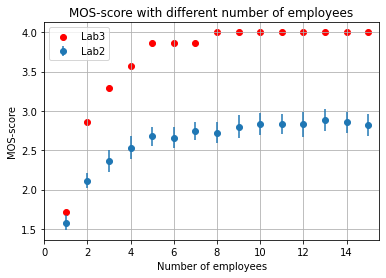

In [61]:
df1_mean_vals = df1.mean()

fig, ax = plt.subplots()

ax.errorbar(range(1, len(mean_vals)+1), list(mean_vals), yerr = list(std_vals), fmt="o")
ax.grid()
ax.set_xlabel("Number of employees")
ax.set_xlim(0,15.5)
ax.set_ylabel("MOS-score")
ax.set_title("MOS-score with different number of employees")
ax.scatter(range(1, len(df1_mean_vals)+1), list(df1_mean_vals), marker = 'o', color="red")
ax.legend(["Lab3", "Lab2"])
plt.savefig("../figures/Fig3.png")